In [16]:
path= '\\Users\\stell\\OneDrive\\Dokumente\\fp55\\Daten\\'
path2='\\Users\\stell\\OneDrive\\Dokumente\\fp55\\Ergebnisse\\'

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
%matplotlib inline

In [17]:
data=np.genfromtxt(path+'tlwia2018-07-23_f0002-Replicate.txt', skip_header=8) #Daten importieren

In [18]:
#Massen alle in g
Gefäß=426.55

m=[935.98, 918.28, 895.00, 874.08, 844.50, 817.04, 783.13, 760.25]

merror=0.05 #Fehler gilt für alle Messungen

In [19]:
#Berechne verbliebenden Wasseranteil
waterfrac=[] #leeres Array
waterfracerror=[]

for i in range(1, len(m)):
    w=(m[i]-Gefäß)/(m[0]-Gefäß)
    werror=np.sqrt((merror/(m[0]-Gefäß)**2+((m[i]-Gefäß)*merror/(m[0]-Gefäß)**2)**2+((m[0]-m[i])*merror/(m[0]-Gefäß)**2)**2))
    waterfrac=np.append(waterfrac, w)
    waterfracerror=np.append(waterfracerror, werror)
print(waterfrac)

[0.96525529 0.91955715 0.87849165 0.82042675 0.76652337 0.69995878
 0.65504584]


In [20]:
name=data[:,0]

D=data[:,1] #Deuterium
Derror=data[:,2]
np.nan_to_num(Derror, copy=False) #wegen zu wenig Daten kann für einen Wert kein Fehler berechnet werden, dieser wird durch 0 ersetz

O18=data[:,3]
O18error=data[:,4]
np.nan_to_num(O18error, copy=False)

O17=data[:,5]
O17error=data[:,6]
np.nan_to_num(O17error, copy=False)

array([0.07 , 0.047, 0.044, 0.129, 0.   , 0.095, 0.058])

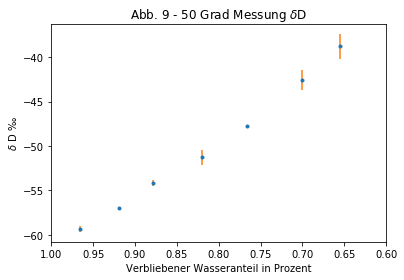

In [21]:
plt.plot(waterfrac, D, '.')
plt.errorbar(waterfrac, D, xerr=waterfracerror, yerr=Derror, linestyle='None')

plt.xlim(1, 0.6) #Von größerer zu kleiner x-Achse

plt.ylabel('$\delta$ D ‰')
plt.xlabel('Verbliebener Wasseranteil in Prozent')
plt.title('Abb. 9 - 50 Grad Messung $\delta$D')
plt.savefig(path2+'Abb9.png')

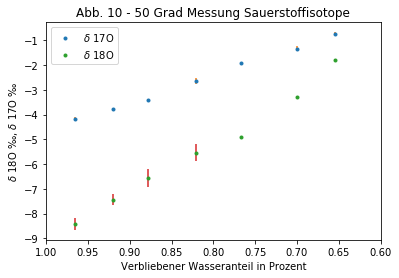

In [22]:
plt.plot(waterfrac, O17, '.',label='$\delta$ 17O')
plt.errorbar(waterfrac, O17, xerr=waterfracerror, yerr=O17error, linestyle='None')

plt.plot(waterfrac, O18, '.', label='$\delta$ 18O')
plt.errorbar(waterfrac, O18, xerr=waterfracerror, yerr=O18error, linestyle='None')
plt.xlim(1, 0.6) #Von größerer zu kleiner x-Achse

plt.ylabel('$\delta$ 18O ‰, $\delta$ 17O ‰')
plt.xlabel('Verbliebener Wasseranteil in Prozent')
plt.legend()
plt.title('Abb. 10 - 50 Grad Messung Sauerstoffisotope')
plt.savefig(path2+'Abb10.png')

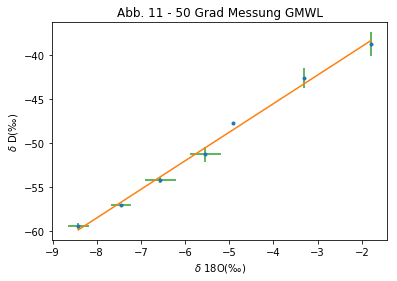

In [23]:
#GMWL

#Fitgerade
def line(x, a, b): 
    return a * x + b
popt, pcov = curve_fit(line, O18, D)

#Plot erstellen

plt.plot(O18, D, '.')
plt.plot(O18,line(O18, *popt))
plt.errorbar (O18, D, xerr=O18error, yerr=Derror, linestyle='None')

plt.ylabel('$\delta$ D(‰)')
plt.xlabel('$\delta$ 18O(‰)')
plt.title('Abb. 11 - 50 Grad Messung GMWL')
plt.savefig(path2+'Abb11.png')

In [24]:
#Fitparameter
print("a =", popt[0], "+/-", pcov[0,0]**0.5) #in Promill
print("b =", popt[1], "+/-", pcov[1,1]**0.5) #in Promill

a = 3.2411277085588726 +/- 0.11987641390034556
b = -32.552064554907304 +/- 0.6995390309647448


delta0 = -0.061319557282172546 +/- 0.0002109154256728725
epsilon = -0.05542339255401911 +/- 0.0008887308614929644
alpha = 0.999944576607446 +/- 8.887308614929645e-07


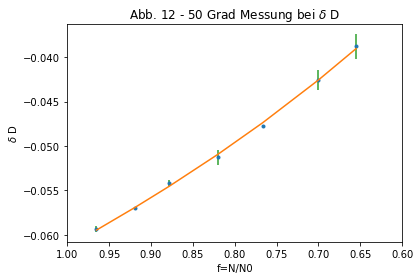

In [25]:
#Fraktionierungs Faktor Alpha - Wasserstoff
f=waterfrac
ferror=waterfracerror

def delta(f, delta0, epsilon):
    return (1+delta0)*((f)**(epsilon))-1

popt, pcov = curve_fit(delta, f, D/1000)

plt.plot(f, D/1000, '.')
plt.plot(f,delta(f, *popt))
plt.errorbar (f, D/1000, xerr=ferror, yerr=Derror/1000, linestyle='None')
plt.xlim(1, 0.6) #Von größerer zu kleiner x-Achse

plt.ylabel('$\delta$ D')
plt.xlabel('f=N/N0')
plt.title('Abb. 12 - 50 Grad Messung bei $\delta$ D ')
plt.savefig(path2+'Abb12.png')

#Fitparameter
print("delta0 =", popt[0], "+/-", pcov[0,0]**0.5) #in Promill
print("epsilon =", popt[1], "+/-", pcov[1,1]**0.5) 

alpha=popt[1]/1000+1
alphaerror=(pcov[1,1]**0.5)/1000
print("alpha =", alpha, "+/-", alphaerror)

delta0 = -0.0045053907582345044 +/- 7.392351699941565e-05
epsilon = -0.00907587829977571 +/- 0.0002954513619078817
alpha = 0.9999909241217002 +/- 2.954513619078817e-07


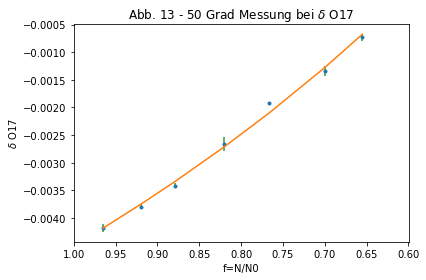

In [26]:
#Fraktionierungs Faktor Alpha - Sauerstoff17
f=waterfrac
ferror=waterfracerror

def delta(f, delta0, epsilon):
    return ((1+delta0)*(f**(epsilon)))-1


popt, pcov = curve_fit(delta, f, O17/1000) 

plt.plot(f, O17/1000, '.')
plt.plot(f,delta(f, popt[0], popt[1]))
plt.errorbar (f, O17/1000, xerr=ferror, yerr=O17error/1000, linestyle='None')
plt.xlim(1, 0.6) #Von größerer zu kleiner x-Achse

plt.ylabel('$\delta$ O17')
plt.xlabel('f=N/N0')
plt.title('Abb. 13 - 50 Grad Messung bei $\delta$ O17')
plt.savefig(path2+'Abb13.png')

#Fitparameter
print("delta0 =", popt[0], "+/-", pcov[0,0]**0.5) #Promill
print("epsilon =", popt[1], "+/-", pcov[1,1]**0.5)

alpha=popt[1]/1000+1
alphaerror=(pcov[1,1]**0.5)/1000
print("alpha =", alpha, "+/-", alphaerror)

delta0 = -0.008861203045167076 +/- 0.00017412838492703055
epsilon = -0.01622060665578209 +/- 0.0006983624189459273
alpha = 0.9999837793933443 +/- 6.983624189459273e-07


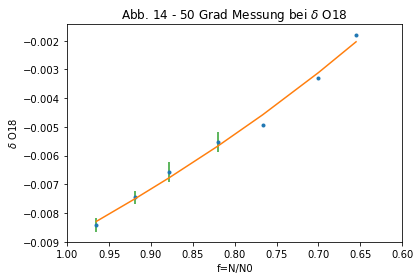

In [27]:
#Fraktionierungs Faktor Alpha - Sauerstoff18
f=waterfrac
ferror=waterfracerror

def delta(f, delta0, epsilon):
    return (1+delta0)*((f)**(epsilon))-1

popt, pcov = curve_fit(delta, f, O18/1000)

plt.plot(f, O18/1000, '.')
plt.plot(f,delta(f, *popt))
plt.errorbar (f, O18/1000, xerr=ferror, yerr=O18error/1000, linestyle='None')
plt.xlim(1, 0.6) #Von größerer zu kleiner x-Achse

plt.ylabel('$\delta$ O18')
plt.xlabel('f=N/N0')
plt.title('Abb. 14 - 50 Grad Messung bei $\delta$ O18 ')
plt.savefig(path2+'Abb14.png')

#Fitparameter
print("delta0 =", popt[0], "+/-", pcov[0,0]**0.5) #in Promill
print("epsilon =", popt[1], "+/-", pcov[1,1]**0.5) 

alpha=popt[1]/1000+1
alphaerror=(pcov[1,1]**0.5)/1000
print("alpha =", alpha, "+/-", alphaerror)